In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
csv_file_path = "/Users/hwanghyejeong/Documents/boaz/lp-patchnote/user_1_match_10.csv"
df = pd.read_csv(csv_file_path, index_col=0)

In [6]:
encoder = LabelEncoder()
df['role'] = encoder.fit_transform(df['role'])
df['puuid'] = encoder.fit_transform(df['puuid'])

In [7]:
X = df.drop(['win', 'match_id',"puuid"], axis=1)  
y = df['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

In [10]:
model = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estim

/Users/hwanghyejeong/.local/share/virtualenvs/lp-patchnote-D_OnX0DY/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
412 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hwanghyejeong/.local/share/virtualenvs/lp-patchnote-D_OnX0DY/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hwanghyejeong/.local/share/virtualenvs/lp-patchnote-D_OnX0DY/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/hwang

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [11]:
# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [12]:
# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Test Inference
y_pred = best_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8260869565217391
Confusion Matrix:
[[ 8  3]
 [ 1 11]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.73      0.80        11
        True       0.79      0.92      0.85        12

    accuracy                           0.83        23
   macro avg       0.84      0.82      0.82        23
weighted avg       0.84      0.83      0.82        23



Feature Importances:
                       Feature  Importance
7                          kda    0.183495
2                   champLevel    0.175923
5                goldPerMinute    0.141896
3           damages_per_minute    0.124959
6         teamDamagePercentage    0.108455
4  damageTakenOnTeamPercentage    0.108365
1                   championId    0.098446
0                         role    0.058462


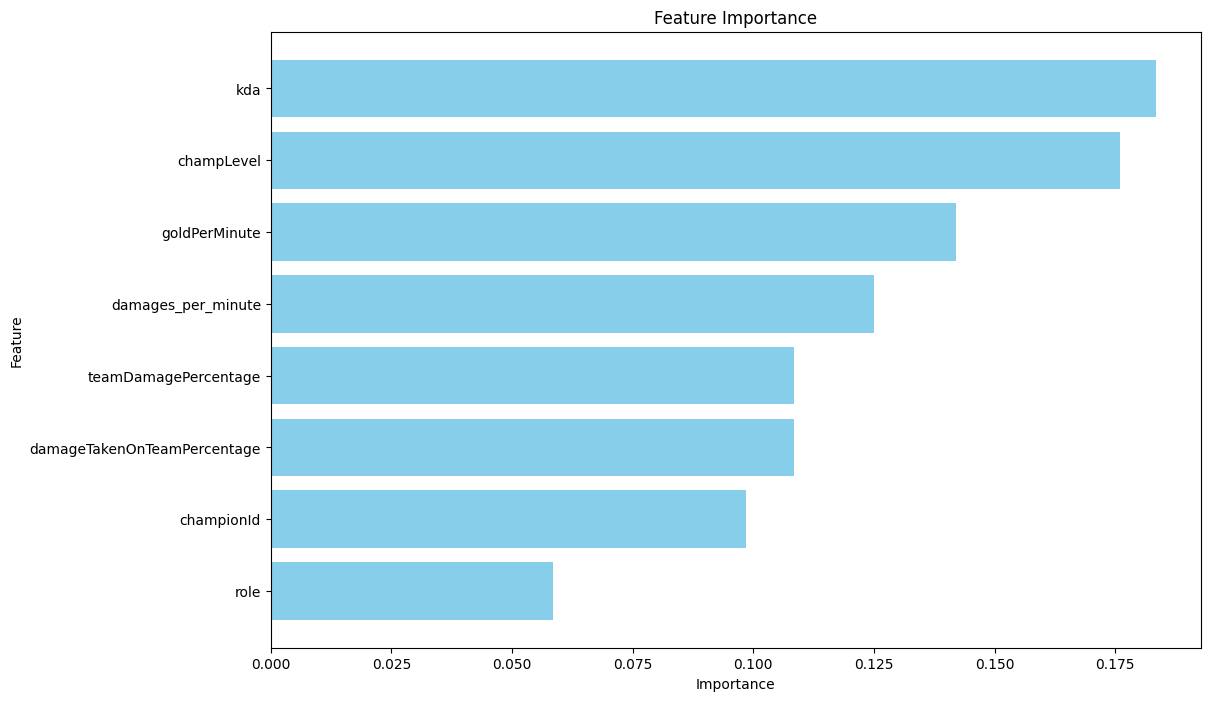

In [16]:
# Feature Importance
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()